# Image2text

##install

In [ ]:
!pip install torch==1.12.1

In [ ]:
!git clone https://github.com/salesforce/LAVIS
%cd LAVIS
!pip install .!git clone https://github.com/salesforce/LAVIS
%cd LAVIS
!pip install .

In [ ]:
import torch
from PIL import Image

from lavis.models import load_model_and_preprocess

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
#откуда брать изображение
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##Images description

In [ ]:
#куда сохранить описание изображения
file_save = open('/content/gdrive/MyDrive/Project/images/descriptions_1.txt','w')
file_save.write('Descriptions' +'\n')

In [ ]:
model, vis_processors, _ = load_model_and_preprocess(
    name="blip_caption", model_type="large_coco", is_eval=True, device=device
)

In [ ]:
init_image = Image.open('/content/gdrive/MyDrive/Project/images/1.jpg').convert("RGB")
init_image = init_image.resize((512, 512))

image = vis_processors["eval"](init_image).unsqueeze(0).to(device)
des = model.generate({"image": image}, use_nucleus_sampling=True, num_captions=1)
#сохраниение описания изображения
file_save.write(des[0] +'\n')

In [ ]:
#des[0]

'an orange squirrel in leaves with a nut'

#Stable diffusion

##install

In [ ]:
# make sure you are running in GPU
!nvidia-smi

In [ ]:
%%capture
!pip install torch==1.12.1+cu113
!pip install torchvision==0.13.1+cu113
!pip install OmegaConf
!pip install -qq accelerate tensorboard transformers ftfy gradio
!pip install triton==2.0.0.dev20220701
!pip install -U -qq git+https://github.com/huggingface/diffusers.git
!pip install GPUtil
!pip install numba
!pip install https://github.com/apolinario/xformers/releases/download/0.0.3/xformers-0.0.14.dev0-cp38-cp38-linux_x86_64.whl

In [ ]:
import torch
from GPUtil import showUtilization as gpu_usage
from numba import cuda
from huggingface_hub import login
from huggingface_hub import snapshot_download
import torch
import os
import torch
from diffusers import DPMSolverMultistepScheduler, StableDiffusionImg2ImgPipeline

from contextlib import nullcontext
#import requests
from PIL import Image
#from io import BytesIO
from torch import autocast

In [ ]:
#куда сохранять изображение
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##generation images

In [ ]:
def free_gpu_cache():
    print("Initial GPU Usage")
    gpu_usage()                             

    torch.cuda.empty_cache()

    cuda.select_device(0)
    cuda.close()
    cuda.select_device(0)

    print("GPU Usage after emptying the cache")
    gpu_usage()

In [ ]:
# setup device to use
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Huggingface_Token = ""
login(token = Huggingface_Token )

ADD_LINK = "stabilityai/stable-diffusion-2-1-base"
WHERE_SAVE_SD_MODEL = os.getcwd()
snapshot_download(repo_id=ADD_LINK, cache_dir = os.getcwd())

In [ ]:
#путь к моделе
MODEL_NAME = "/content/models--stabilityai--stable-diffusion-2-1-base/snapshots/ae20c88a98ede80edcd1945220235e01292b098e"

In [ ]:
scheduler_name="DPMSolverMultistepScheduler"
if scheduler_name == "DPMSolverMultistepScheduler":
    scheduler = DPMSolverMultistepScheduler.from_pretrained(MODEL_NAME, subfolder="scheduler")
    pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
        MODEL_NAME,
        scheduler=scheduler,
        safety_checker=None,
        torch_dtype=torch.float16,
         feature_extractor=None,#раньше работало без него
        revision="fp16",
    ).to("cuda")

  0%|          | 0/70 [00:00<?, ?it/s]

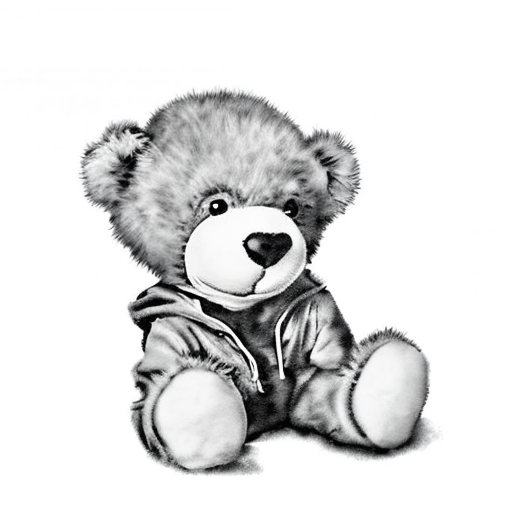

  0%|          | 0/70 [00:00<?, ?it/s]

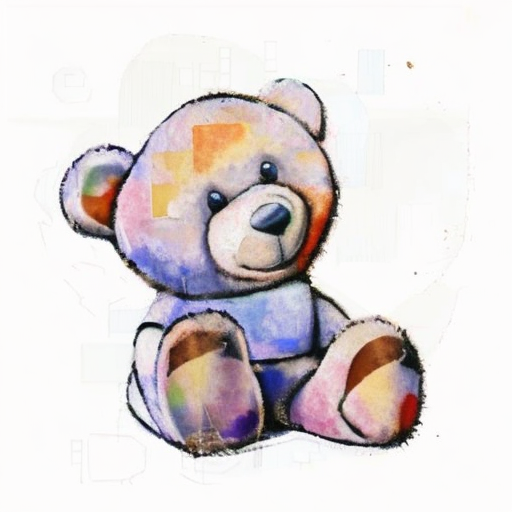

  0%|          | 0/70 [00:00<?, ?it/s]

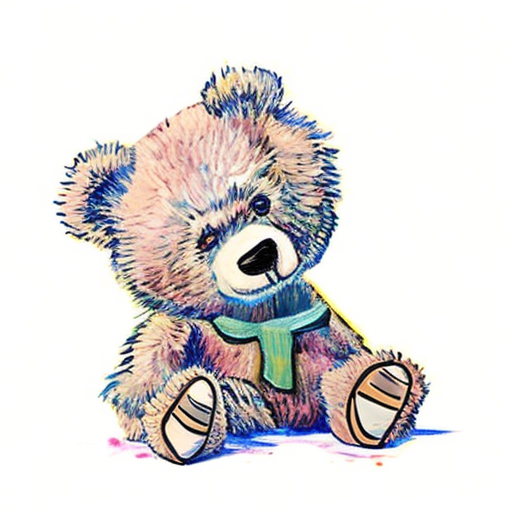

  0%|          | 0/70 [00:00<?, ?it/s]

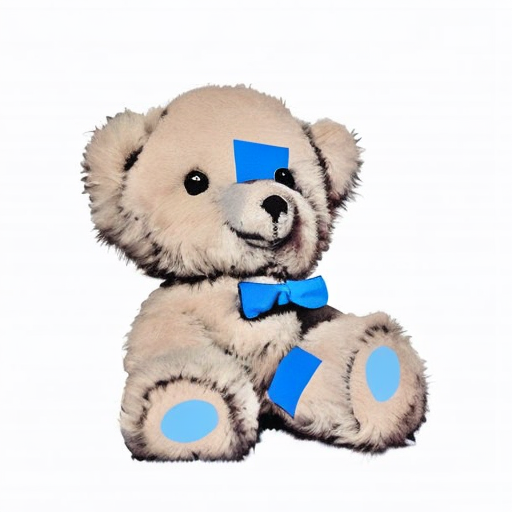

In [ ]:
from torch import autocast

#описание изображения из LAVIS
des = 'painting in the style of Banksy on the wall photo a very cute furry teddy bear with a blue nose'
negative_prompt = "" 
num_samples = 1 
guidance_scale =  9
num_inference_steps = 100 # num_inference_steps - (num_inference_steps - num_inference_steps*strength)
strength = 0.7

#путь к изображению
init_image = Image.open('/content/gdrive/MyDrive/Project/images/1.jpg').convert("RGB")
init_image = init_image.resize((512, 512))

#Banksy
prompt = 'painting in the style of Banksy ' + des
with autocast("cuda"), torch.inference_mode():
        images = pipe(
            prompt=prompt, 
            image=init_image, 
            strength=strength,
            negative_prompt=negative_prompt,
            num_images_per_prompt=num_samples,
            num_inference_steps=num_inference_steps,
            guidance_scale=guidance_scale,
            generator=None,
        ).images
for img in images:
  #путь куда сохранять изображение
  #img.save('/content/gdrive/MyDrive/Project/sad/1.jpg')
  display(img)


#Robert Delaunay
prompt = 'painting in the style of Robert Delaunay ' + des
with autocast("cuda"), torch.inference_mode():
        images = pipe(
            prompt=prompt, 
            image=init_image, 
            strength=strength,
            negative_prompt=negative_prompt,
            num_images_per_prompt=num_samples,
            num_inference_steps=num_inference_steps,
            guidance_scale=guidance_scale,
            generator=None,
        ).images
for img in images:
  #путь куда сохранять изображение
  #img.save('/content/gdrive/MyDrive/Project/sad/1.jpg')
  display(img)


#Vincent Van Gogh
prompt = 'painting in the style of Vincent Van Gogh ' + des
with autocast("cuda"), torch.inference_mode():
        images = pipe(
            prompt=prompt, 
            image=init_image, 
            strength=strength,
            negative_prompt=negative_prompt,
            num_images_per_prompt=num_samples,
            num_inference_steps=num_inference_steps,
            guidance_scale=guidance_scale,
            generator=None,
        ).images
for img in images:
  #путь куда сохранять изображение
  #img.save('/content/gdrive/MyDrive/Project/sad/1.jpg')
  display(img)


#Malevich
prompt = 'painting in the style of Malevich ' + des
with autocast("cuda"), torch.inference_mode():
        images = pipe(
            prompt=prompt, 
            image=init_image, 
            strength=strength,
            negative_prompt=negative_prompt,
            num_images_per_prompt=num_samples,
            num_inference_steps=num_inference_steps,
            guidance_scale=guidance_scale,
            generator=None,
        ).images
for img in images:
  #путь куда сохранять изображение
  #img.save('/content/gdrive/MyDrive/Project/sad/1.jpg')
  display(img)